In [2]:
import os
import csv
import numpy as np

# Maximum length sequence is 193

m = len(os.listdir('make-or-miss'))
data = -1 * np.ones((m, 193, 3))
labels = np.zeros((m,1))
file_index = 0
for filename in os.listdir('make-or-miss'):
    reading_index = 0
    file = os.path.join('make-or-miss', filename)
    with open(file) as f:
        reader = csv.reader(f, delimiter=',')
        first = True
        for row in reader:
            if first:
                first = False
                continue
            data[file_index, reading_index] = row[3:]
            reading_index += 1
        if 'True' in filename:
            labels[file_index] = 1.0
    file_index += 1

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.35, stratify=labels, random_state=0)

In [4]:
import tensorflow as tf
from keras.regularizers import L2

model = tf.keras.Sequential([
    
    tf.keras.layers.LSTM(units=100, return_sequences=False, kernel_regularizer=L2(0.1), input_shape=(193,3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')

  ])

2022-12-05 18:12:19.666217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 18:12:22.892106: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/galactic/opt/yaml_cpp_vendor/lib:/opt/ros/galactic/opt/rviz_ogre_vendor/lib:/opt/ros/galactic/lib/x86_64-linux-gnu:/opt/ros/galactic/lib
2022-12-05 18:12:22.892647: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; L

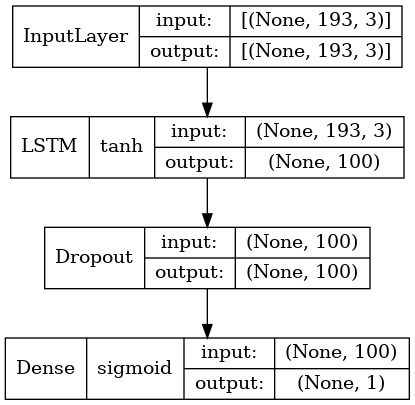

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True)

In [90]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 100)               41600     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [60]:
model.fit(X_train, y_train, batch_size = 4, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 7s 420ms/step - loss: 1.2914 - accuracy: 0.5789 - val_loss: 1.2244 - val_accuracy: 0.6364
Epoch 2/100
5/5 [==============================] - 1s 192ms/step - loss: 1.2338 - accuracy: 0.5789 - val_loss: 1.1838 - val_accuracy: 0.6364
Epoch 3/100
5/5 [==============================] - 1s 158ms/step - loss: 1.1717 - accuracy: 0.6316 - val_loss: 1.1396 - val_accuracy: 0.6364
Epoch 4/100
5/5 [==============================] - 1s 158ms/step - loss: 1.1444 - accuracy: 0.6316 - val_loss: 1.0973 - val_accuracy: 0.6364
Epoch 5/100
5/5 [==============================] - 1s 156ms/step - loss: 1.0732 - accuracy: 0.6316 - val_loss: 1.0595 - val_accuracy: 0.6364
Epoch 6/100
5/5 [==============================] - 1s 152ms/step - loss: 1.0680 - accuracy: 0.6316 - val_loss: 1.0284 - val_accuracy: 0.6364
Epoch 7/100
5/5 [==============================] - 1s 145ms/step - loss: 1.0009 - accuracy: 0.6316 - val_loss: 0.9995 - val_accuracy: 0.6364
Epoch 8/100
5

In [93]:
import time

input = np.expand_dims(X_test[0], axis=0)
times = []
for i in range(100):
    start = time.time()
    prediction = model.predict(input)
    end = time.time()
    times.append(end-start)
print("Average Inference Time:", np.mean(times))

1/1 [==============================] - 0s 51ms/step
Average Inference Time: 0.1829540801048279


In [79]:
import os
import csv
import numpy as np

# Maximum length sequence is 207

m = len(os.listdir('airball-or-not'))
data = -1 * np.ones((m, 207, 3))
labels = np.zeros((m,1))
file_index = 0
for filename in os.listdir('airball-or-not'):
    reading_index = 0
    file = os.path.join('airball-or-not', filename)
    with open(file) as f:
        reader = csv.reader(f, delimiter=',')
        first = True
        for row in reader:
            if first:
                first = False
                continue
            data[file_index, reading_index] = row[3:]
            reading_index += 1
        if 'True' in filename:
            labels[file_index] = 1.0
    file_index += 1

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.35, stratify=labels, random_state=0)

In [87]:
import tensorflow as tf
from keras.regularizers import L2

model = tf.keras.Sequential([
    
    tf.keras.layers.LSTM(units=100, input_shape=(207,3)),
    tf.keras.layers.Dense(1, activation='sigmoid')

  ])

In [88]:
model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [89]:
model.fit(X_train, y_train, batch_size = 16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.6833 - accuracy: 0.5938 - val_loss: 0.6643 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 1s 299ms/step - loss: 0.6770 - accuracy: 0.5938 - val_loss: 0.6555 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 278ms/step - loss: 0.6761 - accuracy: 0.5938 - val_loss: 0.6521 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 274ms/step - loss: 0.6767 - accuracy: 0.5938 - val_loss: 0.6516 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 302ms/step - loss: 0.6756 - accuracy: 0.5938 - val_loss: 0.6496 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 290ms/step - loss: 0.6741 - accuracy: 0.5938 - val_loss: 0.6433 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 270ms/step - loss: 0.6724 - accuracy: 0.5938 - val_loss: 0.6303 - val_accuracy: 0.6667
Epoch 8/100
2/2 